<b> DATASET LINK:  </b> https://www.kaggle.com/datasets/mojtaba142/hotel-booking

#### Business Problem

* In recent years, city hotel and resort hotel have seen high cancellation rates. Each hotel is now dealing with a number of issues as a result, including fewer revenues and less than ideal hotel room use. Consequently, lowering cancellation rates is both hotels primary goal in order to increase the efficiency in generating revenue and for us to offer thorough business advice to address this problem.

* The analysis of hotel booking cancellations as well as other factors that have no bearing on their business and yearly revenue generation are the main topics of this project.

### Assumptions

* No unusual occurences between 2015 and 2017 will have a substantial impact on the data used.
* The information is still current and can be used to analyse a hotel's possible plans in an efficient manner. 
* The hotels are currently not using any of the suggested solutions.

In [1]:
##importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('hotel_booking.csv')

In [4]:
import warnings
warnings.filterwarnings('ignore')

#### EDA and data cleaning

In [5]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [7]:
## Removing personal data of users
data.drop(columns=['name','email','phone-number','credit_card'], axis=1,inplace=True)

In [8]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [9]:
data.shape

(119390, 32)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [11]:
## Reservation status date is in object form. Need to convert it into datetime
import datetime as dt
data['reservation_status_date']=pd.to_datetime(data['reservation_status_date'])

In [13]:
## using describe function for categorical data
data.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [14]:
## getting unique values for each category
for col in data.describe(include='object').columns:
    print(col)
    print(data[col].unique())

hotel
['Resort Hotel' 'City Hotel']
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IR

In [16]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [17]:
## dropping agent and company columns
data.drop(columns=['agent','company'],axis=1,inplace=True)

In [18]:
#removing null values from children and country
data.dropna(inplace=True)

In [19]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [20]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


<AxesSubplot:>

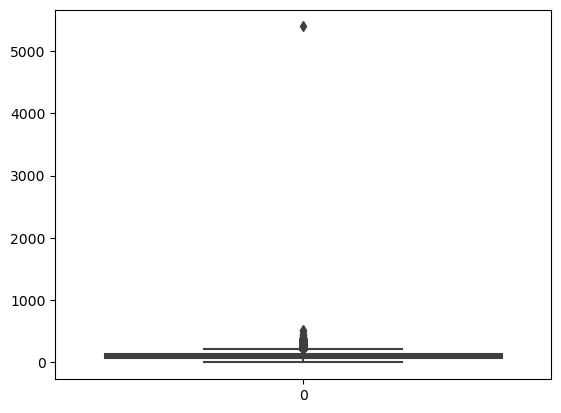

In [21]:
##outlier in adr- average daily rate
## revenue earned per occupied room per day
sns.boxplot(data=data.adr)

In [23]:
data=data[data['adr']<5000]

In [24]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000


### data analysis and visualization

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64


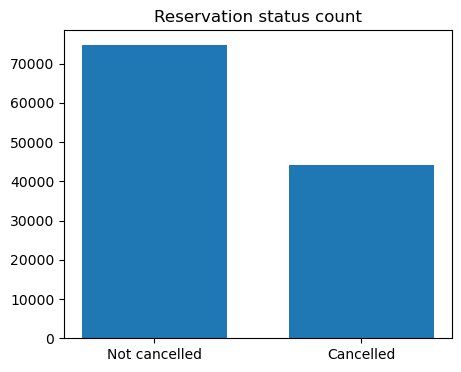

In [29]:
##normalize=True returns a percentage
cancelled_perc = data['is_canceled'].value_counts(normalize=True)
print(cancelled_perc)

##plot
plt.figure(figsize=(5,4))
plt.title("Reservation status count")
plt.bar(['Not cancelled','Cancelled'],data['is_canceled'].value_counts(),width=0.7)
plt.show()

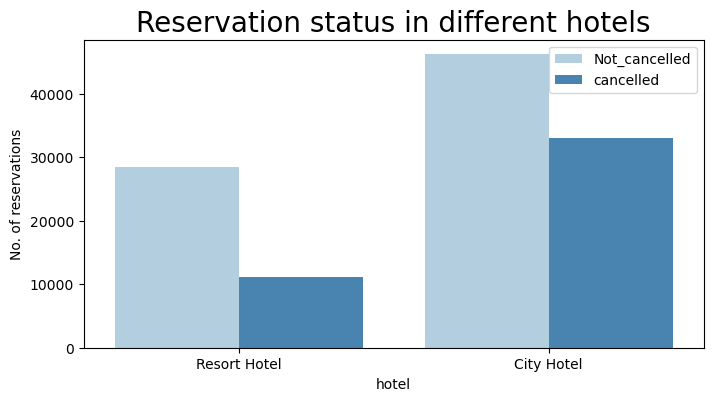

In [33]:
plt.figure(figsize=(8,4))
ax1= sns.countplot(x='hotel',hue='is_canceled',data=data,palette='Blues')
legend_labels,_=ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title("Reservation status in different hotels",size=20)
plt.xlabel('hotel')
plt.ylabel('No. of reservations')
plt.legend(['Not_cancelled','cancelled'])
plt.show()

In [52]:
resort_hotel=data[data['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [53]:
city_hotel=data[data['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

##### is price affecting cancelations?

In [54]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

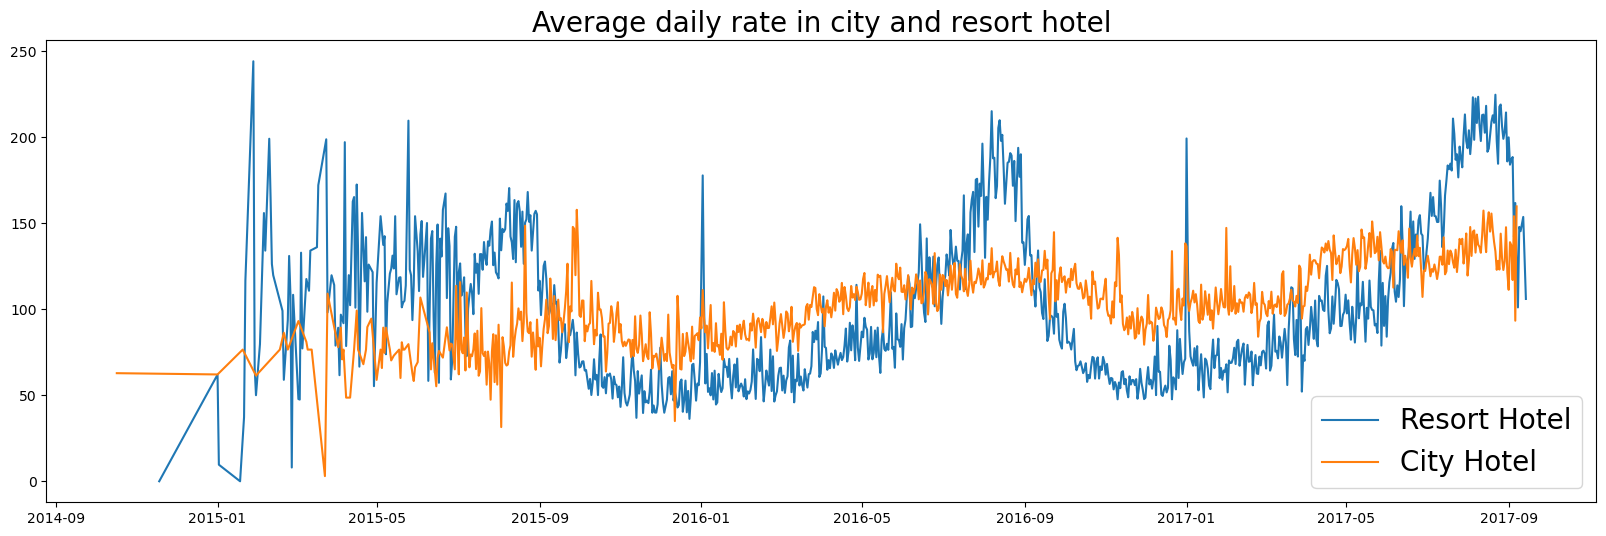

In [81]:
plt.figure(figsize=(20,6))
plt.title('Average daily rate in city and resort hotel',size=20)
plt.plot(resort_hotel.index,resort_hotel['adr'], label='Resort Hotel')
plt.plot(city_hotel.index,city_hotel['adr'], label='City Hotel')
plt.legend(fontsize=20)
plt.show()

* We can see that there are spikes(price hikes) in dataset. This can be due to price hikes during weekends or on holidays.
* Prices hikes in resorts are much higher than those in city hotels.

### checking which months have the most reservations as well as most cancellations

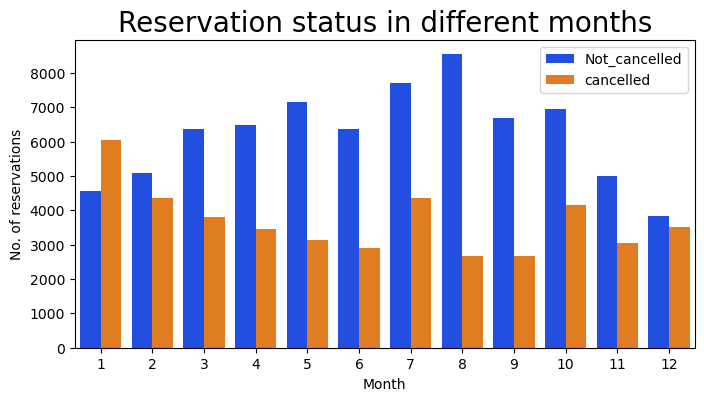

In [57]:
data['month']=data['reservation_status_date'].dt.month
plt.figure(figsize=(8,4))
plt.title('Reservations per month')
ax1= sns.countplot(x='month',hue='is_canceled', data=data, palette='bright')
legend_labels,_ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title("Reservation status in different months",size=20)
plt.xlabel('Month')
plt.ylabel('No. of reservations')
plt.legend(['Not_cancelled','cancelled'])
plt.show()

* January has the most cancellations and August has the least cancellations
* Looks like August has performed the best. We need to find out what is the reason behind it? Were there less prices during that month?

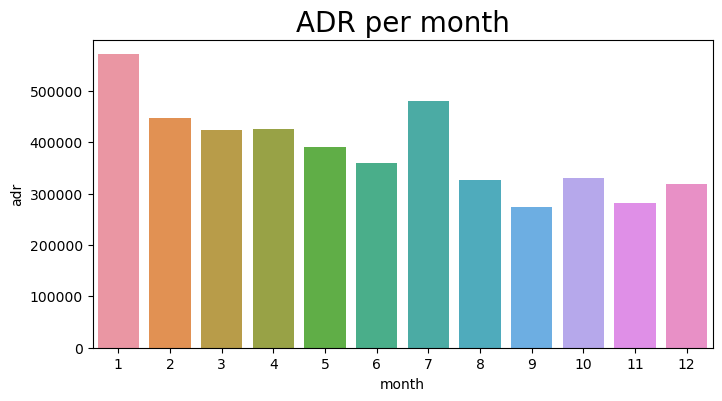

In [61]:
plt.figure(figsize=(8,4))
plt.title('ADR per month', fontsize=20)
sns.barplot('month','adr', data=data[data['is_canceled']==1].groupby('month')[['adr']].sum().reset_index())

plt.show()

* one of our hypothesis is proved where when <b> price is high, the number of cancellations is more. </b>

##### top 10 countries where cancelation is high

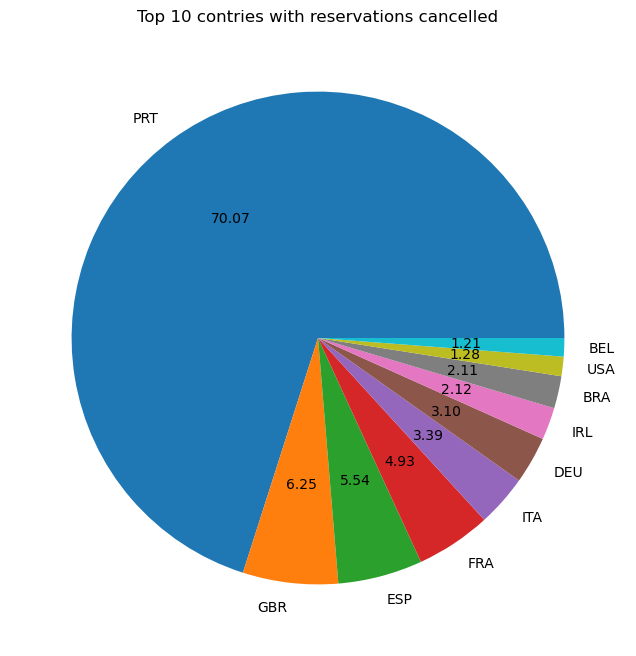

In [64]:
cancelled_data=data[data['is_canceled']==1]
top_10_country=cancelled_data['country'].value_counts()[:10]
plt.figure(figsize=(8,8))
plt.title("Top 10 contries with reservations cancelled")
plt.pie(top_10_country, autopct="%.2f",labels=top_10_country.index)
plt.show()

* Portugal has the highest cancellations. 
* They can reduce prices, increase facilities, do more marketing and advertising. These are some suggestions to reduce their number of cancellations

In [65]:
data['market_segment'].value_counts()

Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

In [66]:
data['market_segment'].value_counts(normalize=True)

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

In [67]:
cancelled_data['market_segment'].value_counts(normalize=True)

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

* A whopping 47% of cancellations are from users who booked through online travel agents
* A possible reason could be that travel agents posted pictures of hotels that aren't the same in reality. 

In [69]:
cancelled_df_adr= cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace=True)
cancelled_df_adr.sort_values('reservation_status_date',inplace=True)

non_cancelled_data=data[data['is_canceled']==0]
non_cancelled_df_adr= non_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
non_cancelled_df_adr.reset_index(inplace=True)
non_cancelled_df_adr.sort_values('reservation_status_date',inplace=True)

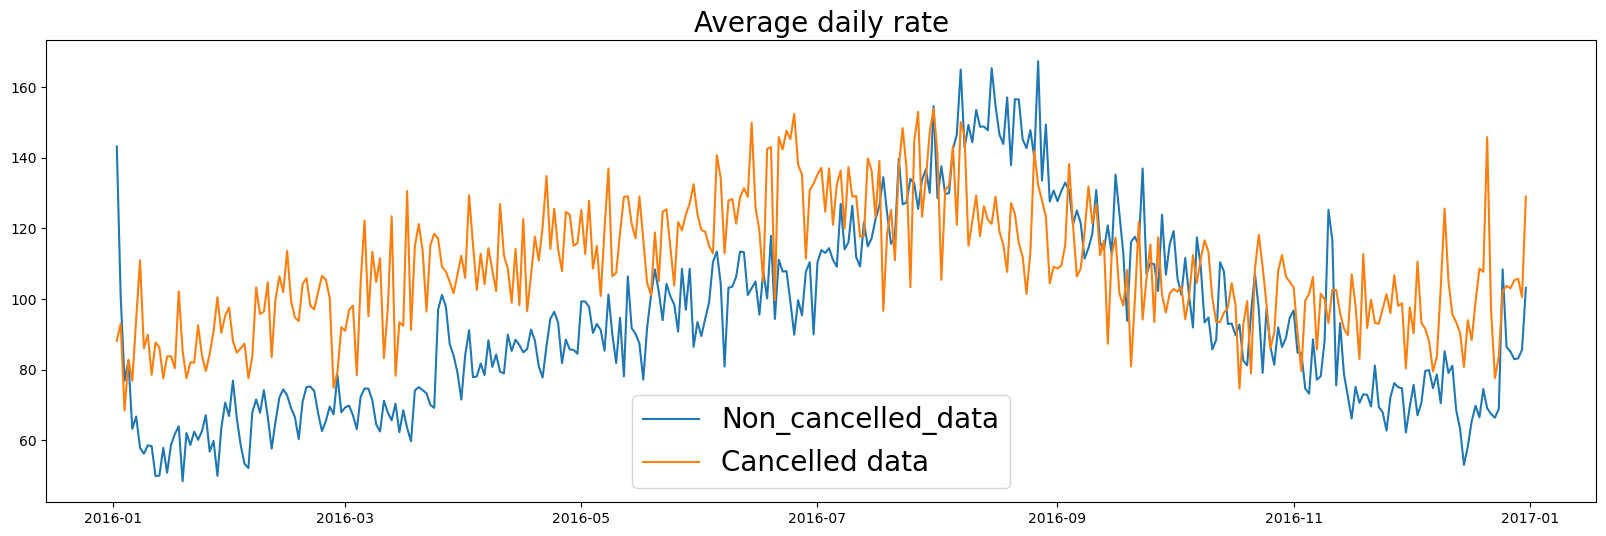

In [80]:
plt.figure(figsize=(20,6))
plt.title('Average daily rate',size=20)
plt.plot(non_cancelled_df_adr['reservation_status_date'],non_cancelled_df_adr['adr'], label='Non_cancelled_data')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'],label='Cancelled data')
plt.legend(fontsize=20)
plt.show()

* data is consistent only between year 2016 and 2017. 
* let's filter out data and then analyze

In [77]:
non_cancelled_df_adr= non_cancelled_df_adr[(non_cancelled_df_adr['reservation_status_date']> '2016') & (non_cancelled_df_adr['reservation_status_date']<'2017-09')]
cancelled_df_adr= cancelled_df_adr[(cancelled_df_adr['reservation_status_date']> '2016') & (cancelled_df_adr['reservation_status_date']<'2017-09')]

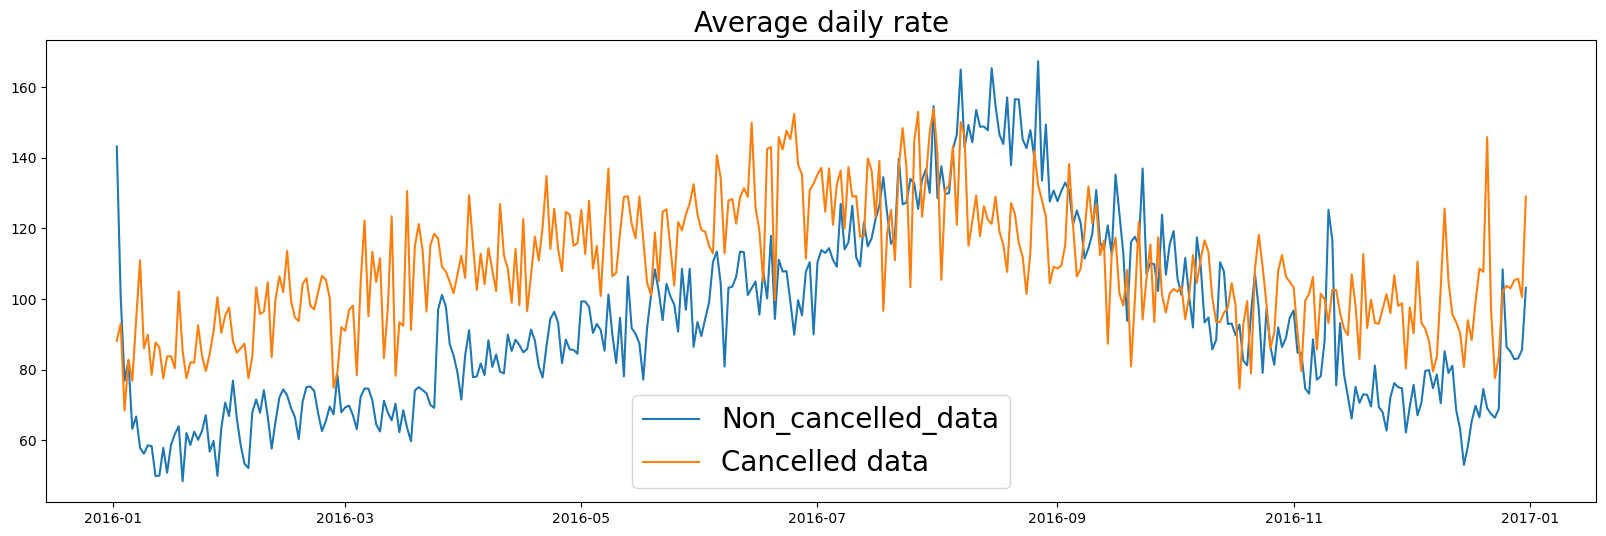

In [79]:
plt.figure(figsize=(20,6))
plt.title('Average daily rate',size=20)
plt.plot(non_cancelled_df_adr['reservation_status_date'],non_cancelled_df_adr['adr'], label='Non_cancelled_data')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'],label='Cancelled data')
plt.legend(fontsize=20)
plt.show()

* <b> We can conclude that as ADR is high, the number of cancellations also is high. Price is the most important factor with respect to cancellations. </b> 

### Suggestions

* Cancellation rates rise as the price does. In order to prevent cancellations of reservations, hotels could work on their pricing strategies and try to lower the rates for specific hotels based on locations. They can also provide some discounts to customers.

* As the ratio of the cancellation and not cancellation of the resort hotel is higher in the resort hotel than the city hotels. So, the hotels should provide a reasonable discount on the room prices on weekends or on holidays.

* In the month of January, hotels can start campaigns or marketing with a reasonable amount to increase their revenue as the cancellation is the highest in this month.

* They can also increase the quality of their hotels and their services mainly in Portugal to reduce the cancellation rate. 